In [1]:
import numpy as np
import glob
import cv2
from tqdm import tqdm
from copy import copy

from makiflow.augmentation import AffineAugment, ElasticAugment, ImageCutter, Data, FlipAugment
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
name = '1.png'
# name = 'datasets/eyes/imgs/1.bmp'
img = cv2.imread(name)
print(img.shape)
img = cv2.resize(img, (1024, 1024))
label = img.copy()

(1020, 1280, 3)


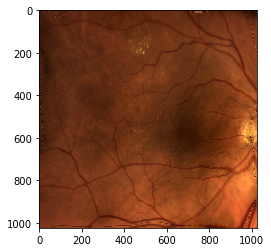

In [15]:
data = Data([img], [label])

data = ElasticAugment(noise_invert_scale=8, std=8, num_maps=1, border_mode='reflect_101',  keep_old_data=False,)(data)

# data = ElasticAugment(alpha=700, noise_invert_scale=7, std=11, num_maps=1, border_mode='replicate',  keep_old_data=False)(data)
# data = ElasticAugment(alpha=400, noise_invert_scale=8, std=8, num_maps=1, border_mode='replicate',  keep_old_data=False)(data)

Xtrain, Ytrain = data.get_data()
plt.imshow(Ytrain[0])

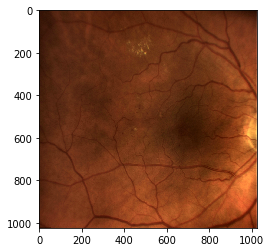

In [10]:
plt.imshow(img)

In [12]:
# name = '1.png'
name = '/mnt/data/med_data/balanced_batches/bb_danil1/masks/527_0.bmp'
img = cv2.imread(name)
print(img.shape)
img = cv2.resize(img, (1024, 1024))
label = img.copy()

(1024, 1024, 3)


In [13]:
data = Data([img], [label])

data = ElasticAugment(num_maps=4, std=8, noise_invert_scale=7, border_mode='replicate', keep_old_data=True)(data)
data = FlipAugment([FlipAugment.FLIP_HORIZONTALLY, FlipAugment.FLIP_VERTICALLY], True)(data)
X, Y = data.get_data()

[0 1 2 3 9]


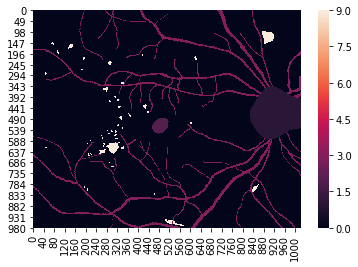

In [15]:
print(np.unique(Y))
sns.heatmap(Y[0][..., 0])